# **Mapping Indonesian Power Plant**

## Context
In this notebook we will explore the power plants operated in Indonesia through a dataset provided by World Resource Institute (WRI). The dataset actually contains data from many countries around the world. For those who interested in exploring further, the data can be downloaded __[here](https://datasets.wri.org/dataset/globalpowerplantdatabase)__. <br>

This notebook will try to address the following points:<br>
1. The number of Indonesian power plants based on its category (primary fuel used)
1. The capacity of each category (in mw)
1. The average capacity of each category
1. Mapping the locations

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns 
import folium

After importing some related libraries, we begin the data elaboration by loading our dataset to the notebook

In [2]:
gpp = pd.read_csv("D:\dataset\WRI\global_power_plant_database_v_1_3\global_power_plant_database.csv", low_memory=False)
gpp.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [3]:
gpp.shape

(34936, 36)

In [4]:
gpp.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

Once the data loaded plus a few lines of code, we have the initial information that the data contains 34.936 rows and 36 columns. <br>
For our objectives, we will slice the data to narrow the focus on Indonesia. 

In [5]:
gpp_indo = gpp[gpp["country_long"] == "Indonesia"]
gpp_indo

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
15641,IDN,Indonesia,Amamapare Port power station,WRI1075798,195.000,-4.8278,136.8391,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,1061.18,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15642,IDN,Indonesia,Ampenan,WRI1000736,56.284,-8.5667,116.0667,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,101.59,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15643,IDN,Indonesia,Amurang power station,WRI1075799,60.000,1.1825,124.4806,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,326.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15644,IDN,Indonesia,Asahan I,WRI1000737,180.000,2.5113,99.2590,Hydro,NaN,NaN,...,614.23,443.82,523.30,555.94,592.43,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
15645,IDN,Indonesia,Bakaru,WRI1000738,126.000,-3.1141,119.6042,Hydro,NaN,NaN,...,423.60,334.58,350.67,415.34,424.69,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15814,IDN,Indonesia,Ubrug/saguling,WRI1001039,18.360,-6.9039,107.6186,Hydro,NaN,NaN,...,67.60,62.66,61.15,72.72,62.42,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
15815,IDN,Indonesia,Ulubelu 1 & 2,WRI1001040,110.000,-5.3096,104.5733,Geothermal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
15816,IDN,Indonesia,Wayang Windu,WRI1001044,227.000,-7.1966,107.6258,Geothermal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
15817,IDN,Indonesia,Wlingi - Brantas,WRI1001045,54.000,-8.0776,112.3311,Hydro,NaN,NaN,...,158.18,138.62,149.71,161.31,165.44,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [6]:
gpp_indo["primary_fuel"].value_counts()

Coal          70
Hydro         41
Gas           41
Oil           16
Geothermal    10
Name: primary_fuel, dtype: int64

Now we know the Indonesian part of the data has 178 rows. When we examine the fuel category, we get five with each respective number:<br>
Coal (70), Hydro (41), Gas (41), Oil (16), and Geothermal (10). As an Indonesian myself, I know that, in fact, Indonesia has other types<br>
of power plant such as solar photovoltaic power plants. Maybe WRI will renew this dataset in forthcoming updates. 


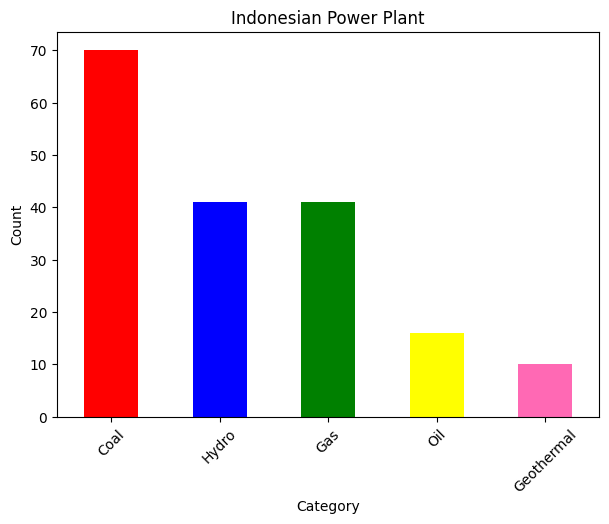

In [14]:
gpp_indo["primary_fuel"].value_counts().plot(kind="bar", color=["red", "blue", "green", "yellow", "hotpink"], figsize=(7,5))

plt.title("Indonesian Power Plant")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The barplot clearly shows how the number of coal-based power plants outnumbers the rest types. For this, <br>
we will dig deeper into the capacity.

In [15]:
gpp_indo["capacity_mw"].describe()

count     178.000000
mean      273.884371
std       545.272231
min         1.000000
25%        30.000000
50%       110.000000
75%       267.500000
max      5355.000000
Name: capacity_mw, dtype: float64

Interestingly, the range of Indonesian power plants' capacity is huge, from 1 mw to 5.355 mw. Perhaps a density plot will show us the distribution, <br>
although we are not doing a complex statistical analysis other than the simple descriptives here. 

(-3000.0, 6000.0)

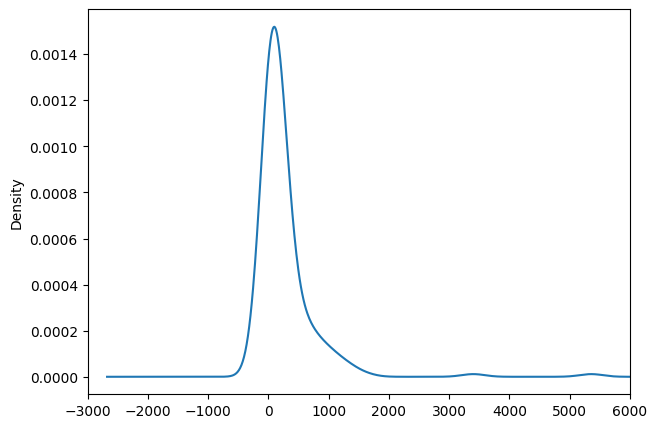

In [19]:
gpp_indo["capacity_mw"].plot(kind="density",
              figsize=(7,5));
plt.xlim(-3000, 6000)

Yes, the curve is very narrow since the mean is only 273.8 mw while the maximum capacity reaches 5.500 mw. <br>
To better understand the capacity for each fuel category, graphing a boxplot will be a nice way.

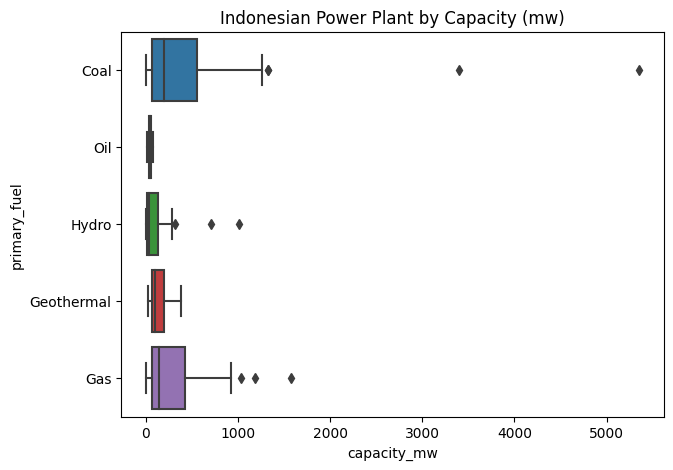

In [18]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(y="primary_fuel", x="capacity_mw", data=gpp_indo)
plt.title("Indonesian Power Plant by Capacity (mw)")

plt.show()

The dots on the boxplot depict what statisticians call outliers. The value of those outliers will <br>
influence the mean. It is time to look into the average capacity for each type of power plant.

In [20]:
gpp_indo.pivot_table(["capacity_mw"], ["primary_fuel"], aggfunc="mean")

,capacity_mw
primary_fuel,
Coal,419.042857
Gas,312.439024
Geothermal,134.200000
Hydro,111.209561
Oil,44.176625


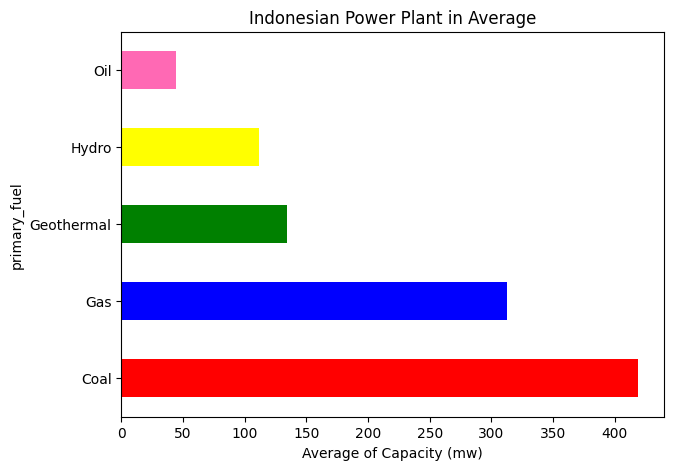

In [23]:
gpp_indo_capacityavg = gpp_indo.groupby(["primary_fuel"]).capacity_mw.agg(np.mean)
gpp_indo_capacityavg.plot(kind="barh", color=["red", "blue", "green", "yellow", "hotpink"], figsize=(7,5))
plt.title("Indonesian Power Plant in Average")
plt.xlabel("Average of Capacity (mw)")
plt.show()

Thanks to WRI for including each power plant coordinate in the dataset so we can locate <br>
them in maps. Before constructing the map we will create a new DataFrame focusing on the location.

In [24]:
gpp_indo_loc = gpp_indo[["name", "latitude", "longitude"]]
gpp_indo_loc

,name,latitude,longitude
15641,Amamapare Port power station,-4.8278,136.8391
15642,Ampenan,-8.5667,116.0667
15643,Amurang power station,1.1825,124.4806
15644,Asahan I,2.5113,99.2590
15645,Bakaru,-3.1141,119.6042
...,...,...,...
15814,Ubrug/saguling,-6.9039,107.6186
15815,Ulubelu 1 & 2,-5.3096,104.5733
15816,Wayang Windu,-7.1966,107.6258
15817,Wlingi - Brantas,-8.0776,112.3311


Our first map will be a standard map in which we will put a marker on each power plant's coordinate.

In [25]:
map = folium.Map(location=[gpp_indo_loc.latitude.mean(), gpp_indo_loc.longitude.mean()], zoom_start=4, control_scale=True)
map

In [29]:
for index, info in gpp_indo_loc.iterrows():
    folium.Marker([info["latitude"], info["longitude"]],icon=folium.Icon(color='green'), popup=info["name"]).add_to(map)

map

In the second map, we will change the map style/theme (in the Folium library it is called "tiles") to get a different look. 

In [30]:
indo_map = folium.Map(location=[gpp_indo_loc.latitude.mean(), gpp_indo_loc.longitude.mean()],
                      zoom_start=4,
                      tiles="CartoDB dark_matter")

indo_map

In [31]:
for index, info in gpp_indo_loc.iterrows():
    folium.CircleMarker([info["latitude"], info["longitude"]],popup=info["name"],radius = 5,
    fill = True,
    color = "red",
    fill_color = "white").add_to(indo_map)

indo_map